<a href="https://colab.research.google.com/github/shaikha99/masar/blob/main/final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part I

> Medical Cost Personal Datasets
>> Supervisor : Mis.danah almuhaysin
>>> team members :
>>>> Shaikha Hamad Almarri
, Alaa Soud Alahmadi , Asma Fayiz Alhowaish,
Kamilah Ali,Laila abdullah almohaymid,refeah alnafiei


objective : Our problem would be to predict if a person is smoker or not based on all the other features in the dataset.






DataSet Description

* age: age of primary beneficiary

* sex: insurance contractor gender, female, male

* bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

* children: Number of children covered by health insurance / Number of dependents

* smoker: Smoking

* region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

* charges: Individual medical costs billed by health insurance

##libraries

In [ ]:
#Import libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from typing_extensions import dataclass_transform
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

## 1- Data Loading

In [ ]:
#Read data from excel file
data = pd.read_csv('/content/insurance.csv')

In [ ]:
#explore the data
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


##2- Exploratory Data Analysis

In [ ]:
# Question 1: how many rows & columns in our dataset
# get the number of rows and columns
rows =data.shape[0]
columns =data.shape[1]

print('There are {} rows and {} columns.'.format(rows,columns))

There are 1338 rows and 7 columns.


Using the function info(), we can check:

- data types (int, float, or object (e.g., string))
- missing values
- memory usage
- number of rows and columns

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1335 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
#get the column
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [ ]:
# Check for missing values
print(data.isnull().sum())

age         0
sex         0
bmi         3
children    0
smoker      0
region      0
charges     0
dtype: int64


In [ ]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1335.000000,1338.000000,1338.000000
mean,39.207025,30.661423,1.094918,13270.422265
std,14.049960,6.101038,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.302500,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.687500,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
# Q2 :how many smokers vs non-smokers we have
# Data Imbalance Checking
# select smokers
smokers = data[data['smoker'] == 'yes']

# select non smokers
non_smokers =data[data['smoker'] == 'no']

print('There are {} smokers and {} non-smokers.'.format(smokers.shape[0], non_smokers.shape[0]))

There are 274 smokers and 1064 non-smokers.


###Data Visulaistion

####Bar chart

Distrbution smoker and non soker btween gender and dataset suggests higher proportion meals ar smokers compar to famele

smoker   no  yes
sex             
female  547  115
male    517  159


<Axes: xlabel='sex'>

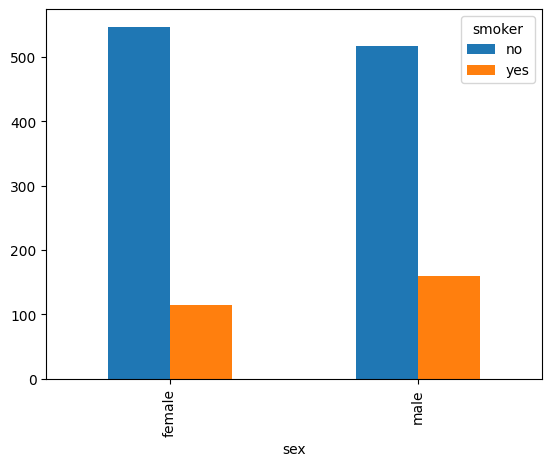

In [ ]:
Gender = pd.crosstab(data['sex'],data['smoker'])
print(Gender)
Gender.plot(kind='bar')

In [ ]:
sex_region_charges = data.pivot_table(index='sex', columns='region', values='charges')
sex_region_charges

region,northeast,northwest,southeast,southwest
sex,,,,
female,12953.203151,12479.870397,13499.669243,11274.411264
male,13854.005374,12354.119575,15879.617173,13412.883576


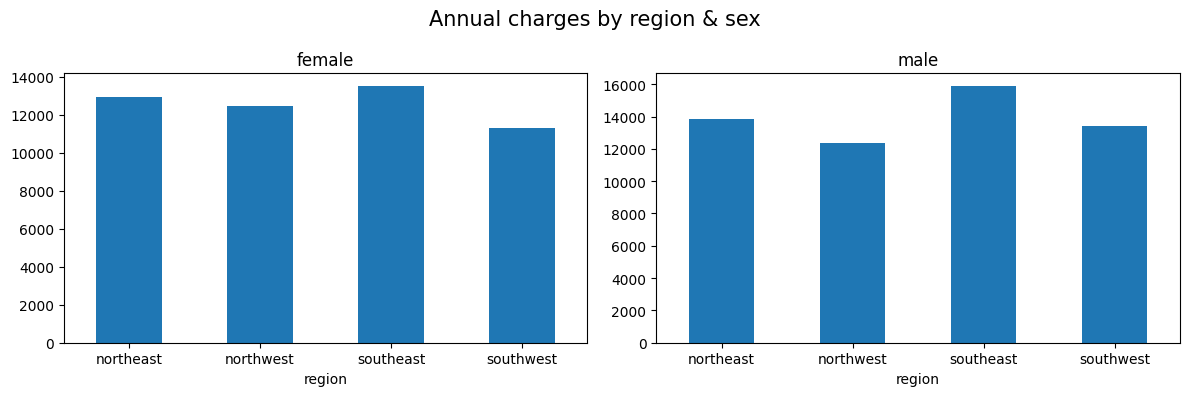

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

for ax, sex in zip(ax.flat, sex_region_charges.index):
    sex_region_charges.xs(sex).plot(kind='bar', rot=0, ax=ax,)
    ax.set_title(sex)

plt.suptitle('Annual charges by region & sex', fontsize=15)
plt.tight_layout()

####Correlation Heatmap

<ipython-input-18-009d9cd2401d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='coolwarm')  # Correlation Heatmap


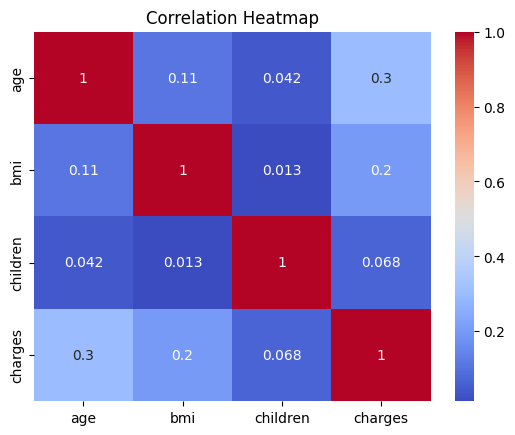

In [ ]:
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')  # Correlation Heatmap
plt.title('Correlation Heatmap')
plt.show()

####box plot

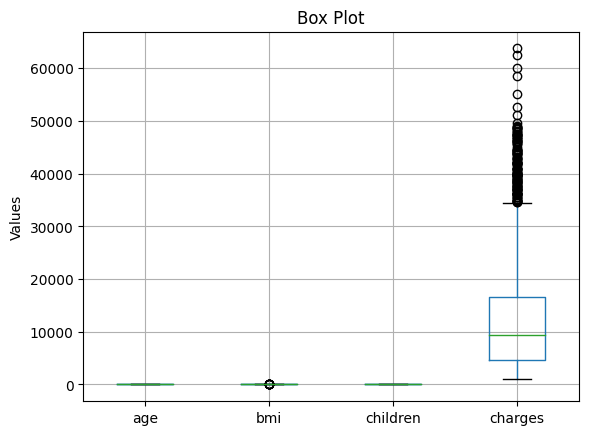

In [ ]:

# Create a box plot for outlier detection
data.boxplot()
plt.title('Box Plot')
plt.ylabel('Values')
plt.show()

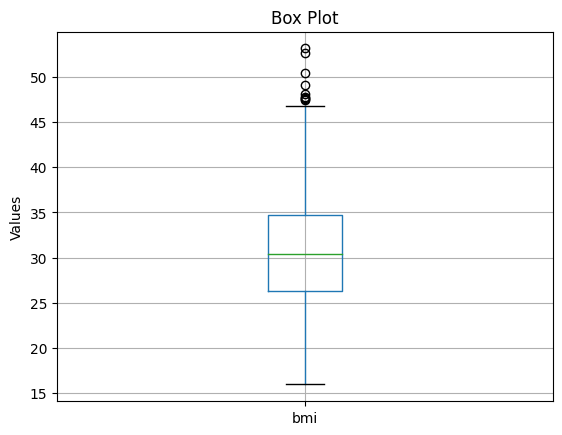

In [ ]:
# Create a box plot for outlier detection
data.boxplot('bmi')
plt.title('Box Plot')
plt.ylabel('Values')
plt.show()

####histogram

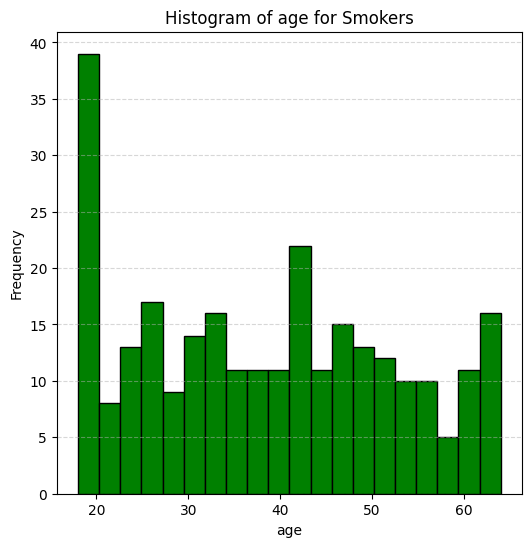

In [ ]:
smoker_column = 'smoker'
age_column = 'age'

# Filter smokers only
smoker_data = data[data[smoker_column] == 'yes']

# Create a histogram for the age of smokers
plt.figure(figsize=(6, 6))
plt.hist(smoker_data[age_column], bins=20, color='green', edgecolor='black')
plt.title(f'Histogram of {age_column} for Smokers')
plt.xlabel(age_column)
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

Distribution smoker and non smoker dataset suggests higher proportion for non smokers compared to smoker

<Axes: >

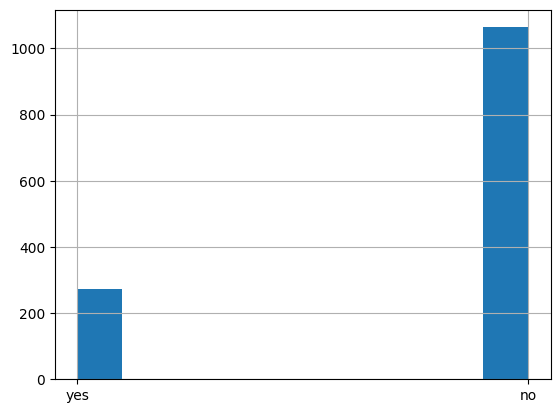

In [ ]:
data['smoker'].hist()

## 3- Data Processing

In [ ]:
#Q1:Convert Categorical columns to numerical

In [ ]:
# define dictionary
gender = {'male':0, 'female':1}

# replace sex column with 0/1
data['sex'] = data['sex'].apply(lambda x: gender[x])

# print head to verify
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,yes,southwest,16884.92400
1,18,0,33.770,1,no,southeast,1725.55230
2,28,0,33.000,3,no,southeast,4449.46200
3,33,0,22.705,0,no,northwest,21984.47061
4,32,0,28.880,0,no,northwest,3866.85520


In [ ]:
# define dictionary
smokers = {'no': 0, 'yes': 1}

# replace smokers column with 0/1
data['smoker'] = data['smoker'].apply(lambda x: smokers[x])

# print head to verify
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520


In [ ]:
data['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [ ]:
# define dictionary
regions = {'southwest':0, 'southeast':1, 'northwest':2, 'northeast':3}
# replace region column with the corresponding values
data['region'] = data['region'].apply(lambda x: regions[x])
# print head to verify
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,0,16884.92400
1,18,0,33.770,1,0,1,1725.55230
2,28,0,33.000,3,0,1,4449.46200
3,33,0,22.705,0,0,2,21984.47061
4,32,0,28.880,0,0,2,3866.85520


In [ ]:
# Check for missing values
print(data.isnull().sum())

age         0
sex         0
bmi         3
children    0
smoker      0
region      0
charges     0
dtype: int64


In [ ]:
data.dropna(inplace=True)

In [ ]:
# Check for missing values
print(data.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [ ]:
# Check for duplicate rows
print(data.duplicated().sum())

1


In [ ]:
# Drop duplicate rows
data.drop_duplicates(inplace=True)

In [ ]:
# Check for duplicate rows
print(data.duplicated().sum())

0


### Normalization

In [ ]:
min_max_scaler = MinMaxScaler()
cols_to_normalize = ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']
data[cols_to_normalize] = min_max_scaler.fit_transform(data[cols_to_normalize])

In [ ]:
data.describe()

,age,sex,bmi,children,smoker,region,charges
count,1334.000000,1334.000000,1334.000000,1334.000000,1334.000000,1334.000000,1334.000000
mean,0.461117,0.495502,0.395520,0.219640,0.205397,0.495252,0.194261
std,0.305256,0.500167,0.164200,0.241161,0.404143,0.368288,0.193450
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.195652,0.000000,0.278080,0.000000,0.000000,0.333333,0.057857
50%,0.456522,0.000000,0.387947,0.200000,0.000000,0.333333,0.131956
75%,0.717391,1.000000,0.504002,0.400000,0.000000,0.666667,0.249404
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,0.021739,1.0,0.321227,0.0,1.0,0.000000,0.251611
1,0.000000,0.0,0.479150,0.2,0.0,0.333333,0.009636
2,0.217391,0.0,0.458434,0.6,0.0,0.333333,0.053115
3,0.326087,0.0,0.181464,0.0,0.0,0.666667,0.333010
4,0.304348,0.0,0.347592,0.0,0.0,0.666667,0.043816


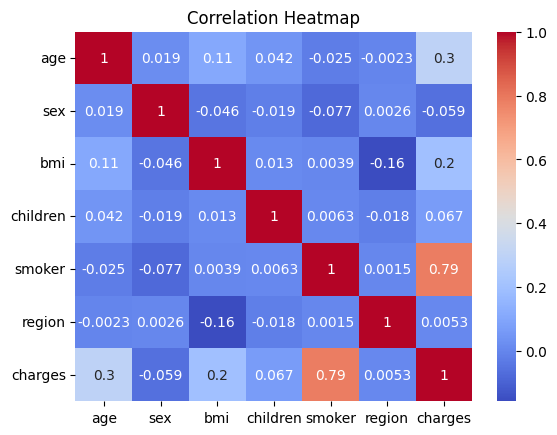

In [ ]:
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')  # Correlation Heatmap
plt.title('Correlation Heatmap')
plt.show()

## 4- ML Model

### logstic Regression

In [ ]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,0.021739,1.0,0.321227,0.0,1.0,0.000000,0.251611
1,0.000000,0.0,0.479150,0.2,0.0,0.333333,0.009636
2,0.217391,0.0,0.458434,0.6,0.0,0.333333,0.053115
3,0.326087,0.0,0.181464,0.0,0.0,0.666667,0.333010
4,0.304348,0.0,0.347592,0.0,0.0,0.666667,0.043816


In [ ]:
data.dtypes

age         float64
sex         float64
bmi         float64
children    float64
smoker      float64
region      float64
charges     float64
dtype: object

In [ ]:
X = data.drop('smoker' , axis = 1 )
y = data['smoker'] # target

In [ ]:
# split dataset in a 80/20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1067, 6) (1067,)
(267, 6) (267,)


In [ ]:
# Initialize the Logistic Regression model
lr = LogisticRegression()

In [ ]:
# Train the model
lr.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# Make predictions on the test set
predictions = lr.predict(X_test)

In [ ]:
accuracy_model = accuracy_score(predictions, y_test)

print("Accuracy:", accuracy_model)

Accuracy: 0.9176029962546817


##5- Model Improvement

<Axes: >

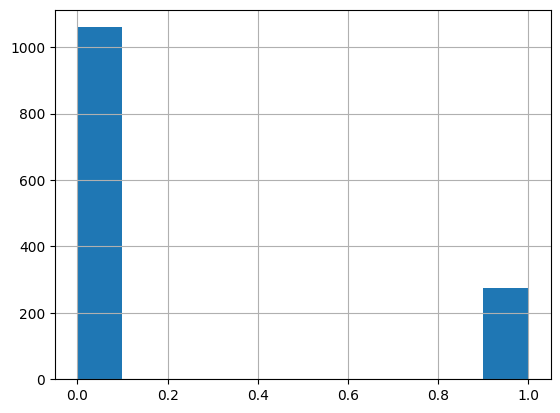

In [ ]:
data['smoker'].hist()

We can see that we have a clearly imbalanced dataset. To handle it, we choose to do 2 steps:

- Oversampling the minority class with a factor of 0.5
- Undersampling the majority class to obtain the same number in the 2 classes


We do that by using the RandomOverSaampler and RandomUnderSampler from the imblearn library.

In [ ]:
over = RandomOverSampler(sampling_strategy= 0.5)
x_new, y_new = over.fit_resample(X, y)

under = RandomUnderSampler(sampling_strategy= 1)
x_new, y_new = under.fit_resample(X, y)

(array([274.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 274.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

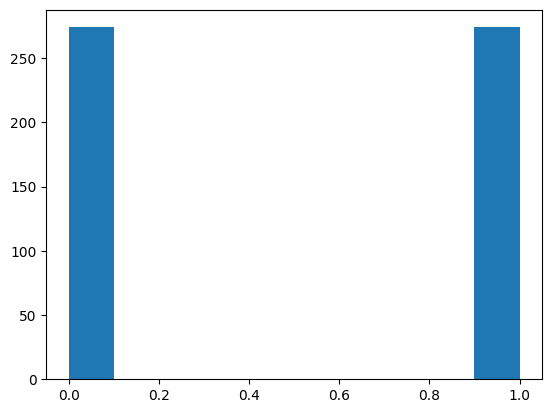

In [ ]:
plt.hist(y_new)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_new, y_new, test_size=0.2, random_state=42)

model = LogisticRegression()

model.fit(x_train, y_train)

LogisticRegression()

In [ ]:
y_pred = model.predict(x_test)

accuracy_model1 = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy_model1)

Accuracy: 0.9727272727272728


#part ll

1. Loop:
Question:
Write a Python program that uses a 'for' loop to print all even numbers from 1 to 10. Then, use 'while' loop.

In [ ]:
# Using 'for' loop
print("Using 'for' loop:")
for i in range(1, 11):
    if i % 2 == 0:
        print(i)

Using 'for' loop:
2
4
6
8
10


In [ ]:
# Using 'while' loop
print("\nUsing 'while' loop:")
num = 1
while num <= 10:
    if num % 2 == 0:
        print(num)
    num += 1



Using 'while' loop:
2
4
6
8
10


2. Control Flows:
Question:
Create a Python function named grade_classifier that takes a student's score as an argument and returns a string indicating their grade. Use the following criteria:

Score >= 90: "A"
80 <= Score < 90: "B"
70 <= Score < 80: "C"
60 <= Score < 70: "D"
Score < 60: "F"

In [ ]:
def grade_classifier(score):
    if score >= 90:
        return "A"
    elif 80 <= score < 90:
        return "B"
    elif 70 <= score < 80:
        return "C"
    elif 60 <= score < 70:
        return "D"
    else:
        return "F"

user_score = input("Enter the student score: ")

# Convert user_score to float
user_score = float(user_score)
if 0 <= user_score <= 100:
    result = grade_classifier(user_score)
    print(f"The student's grade is: {result} ")
else:
    print("Wrong score!! Please enter a score between 0 and 100.")

Enter the student score: 70
The student's grade is: C 



3.Question:
Write a Python program that prompts the user to enter their age. Use if-elif-else statements to categorize and print the user's age group as follows:

If the age is less than 13, print "Child."
If the age is between 13 and 19 (inclusive), print "Teenager."
If the age is between 20 and 59 (inclusive), print "Adult."
If the age is 60 or older, print "Senior Citizen."

In [ ]:
def age_classifier(age):
    if age < 13:
        return "Child."
    elif 13<= age <=19:
        return "Teenager."
    elif 20<= age <= 59:
        return "Adult."
    else:
        return "Senior Citizen."


user_age = input("Enter the age please: ")
user_age=int(user_age)
print("Your age classified as :",age_classifier(user_age))


Enter the age please: 19
Your age classified as : Teenager.


4. Functions:
Question:
Define a Python function named multiply_numbers that takes two parameters (num1 and num2) and returns their product. Test the function with values 5 and 7.

In [ ]:
def multiply_numbers(num1, num2):
  ##Function to multiply two numbers
    product = num1 * num2
    return product

# Test the function with values 5 and 7
result = multiply_numbers(5, 7)
print("The product is:", result)

The product is: 35


5. Combine All the Above:
Question:
Write a Python program that does the following:

Prompts the user to enter a number (user_num).
Uses a loop to print all numbers from 1 to user_num (inclusive) that are divisible by 3.
Calls the grade_classifier function to classify a user's score (you can use a predefined score for testing).
Prints a message indicating whether the classified grade is satisfactory or not.

In [ ]:
user_num = int(input("Enter a number:"))
print(f"Number divisible by 3 from 1 to {user_num}:")
for num in range(1, user_num +1):
  if num % 3 == 0:
    print(num)

print("The classifier's grade is satisfactory")

Enter a number:24
Number divisible by 3 from 1 to 24:
3
6
9
12
15
18
21
24
The classifier's grade is satisfactory
